## Exam 2 Week 11    

### Add your first and last name here.

#### Value 2000 pts

In [7]:
import matplotlib.pyplot as plt
# Import necessary packages

# Utilty packages
import seaborn as sns

# Data management packages
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import gaussian_kde
import openpyxl

# Machine Learning packages
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Other packages (define the category however you like) 

### Question 1 (1000 pts)


Classification is a type of supervised machine learning problem where the target (response) variable is categorical. Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (y). 

1. Using the statistical and graphical techniques from Cast Study 5, perform an EDA on the Iris dataset with the intention of determining what phenotypic characteristics (meausrements of sepal and petal dimensions) are likely to be most useful in predicting the species of the plant. Support your observations with statistics and graphs. 

2. Build a KNN Classifier in `scikit-learn` that predicts Iris species. Use a training/test split of 70/30. 
    - First, use only the best two measurements to predict the species. Vary the k-value to acquire the best accuracy and the most generalizable model (the k-value at which maximizes both training and test accuracy scores).
    - Next, use all available measurements to predict the species. Vary the k-value as before.
    - Compare and explain the results from the first two parts. For example, you should explain which one did better and whether the k-values the same? If not, why? 

<h3> Loading Dataset</h3>

In [8]:
# Provide your answer in cells here and below.
iris_data = datasets.load_iris()

#when converting to a data from just put the feature names from the iris dataset as the columns
#saves time since you don't need to type it all out.
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
target_names = iris_data["target_names"] #names of species we need

#to clean up the column names.
for x in iris_df.columns:
    newName = " ".join(x[:-5].split())
    iris_df.rename(columns={x: newName}, inplace=True)
    
#np.concatentate joins arrays on an existing axis and then np.repeat just repeats 
#stuff so just, stuff both of then into a new column.
iris_df["species"] = np.concatenate([np.repeat(x, 50) for x in target_names])
iris_df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')

<h3>Statistics</h3>

In [22]:
print(iris_df.groupby(["species"])["sepal length"].describe())
print(iris_df.groupby(["species"])["sepal width"].describe())
print(iris_df.groupby(["species"])["petal length"].describe())
print(iris_df.groupby(["species"])["petal width"].describe())

            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
            count   mean       std  min  25%  50%  75% 

<h2> graphs </h2>

<Axes: title={'center': 'Comparison between various species based on sapel length and width'}, xlabel='sepal length', ylabel='sepal width'>

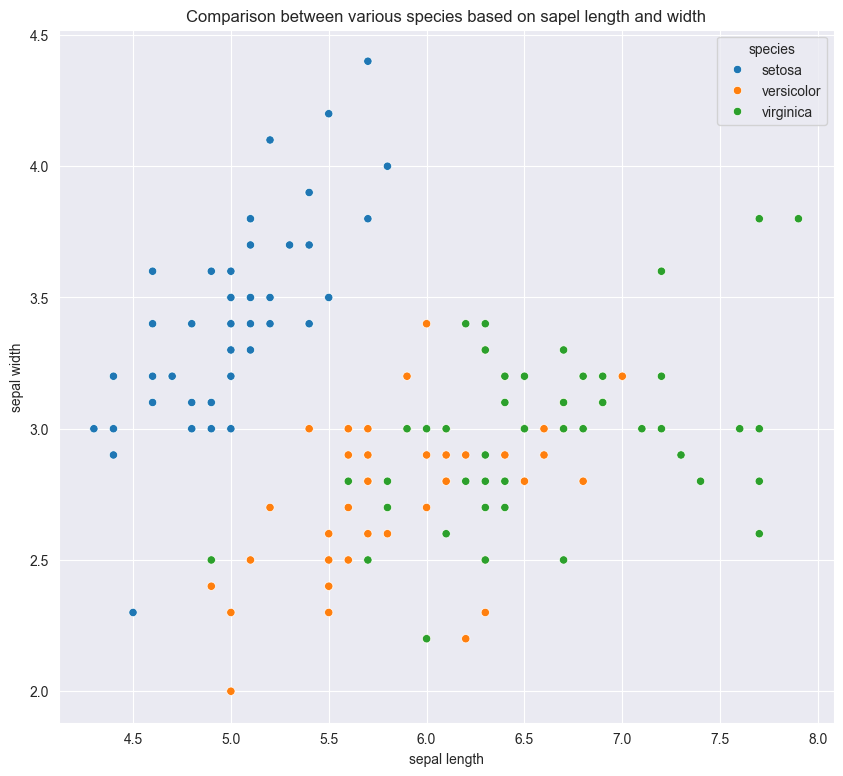

In [10]:
plt.figure(figsize=(10,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(x= iris_df["sepal length"], y= iris_df["sepal width"], hue= iris_df["species"], data=iris_df)

<Axes: title={'center': 'Comparison between various species based on petal length and width'}, xlabel='petal length', ylabel='petal width'>

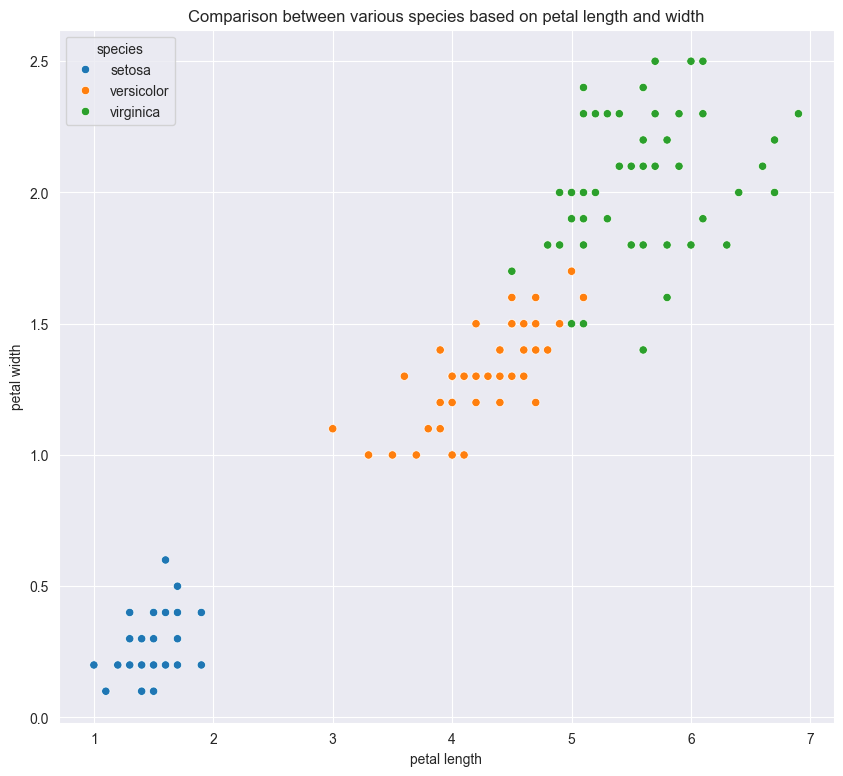

In [11]:
plt.figure(figsize=(10,9))
plt.title("Comparison between various species based on petal length and width")
sns.scatterplot(x=iris_df["petal length"], y=iris_df["petal width"], hue= iris_df["species"], data=iris_df)

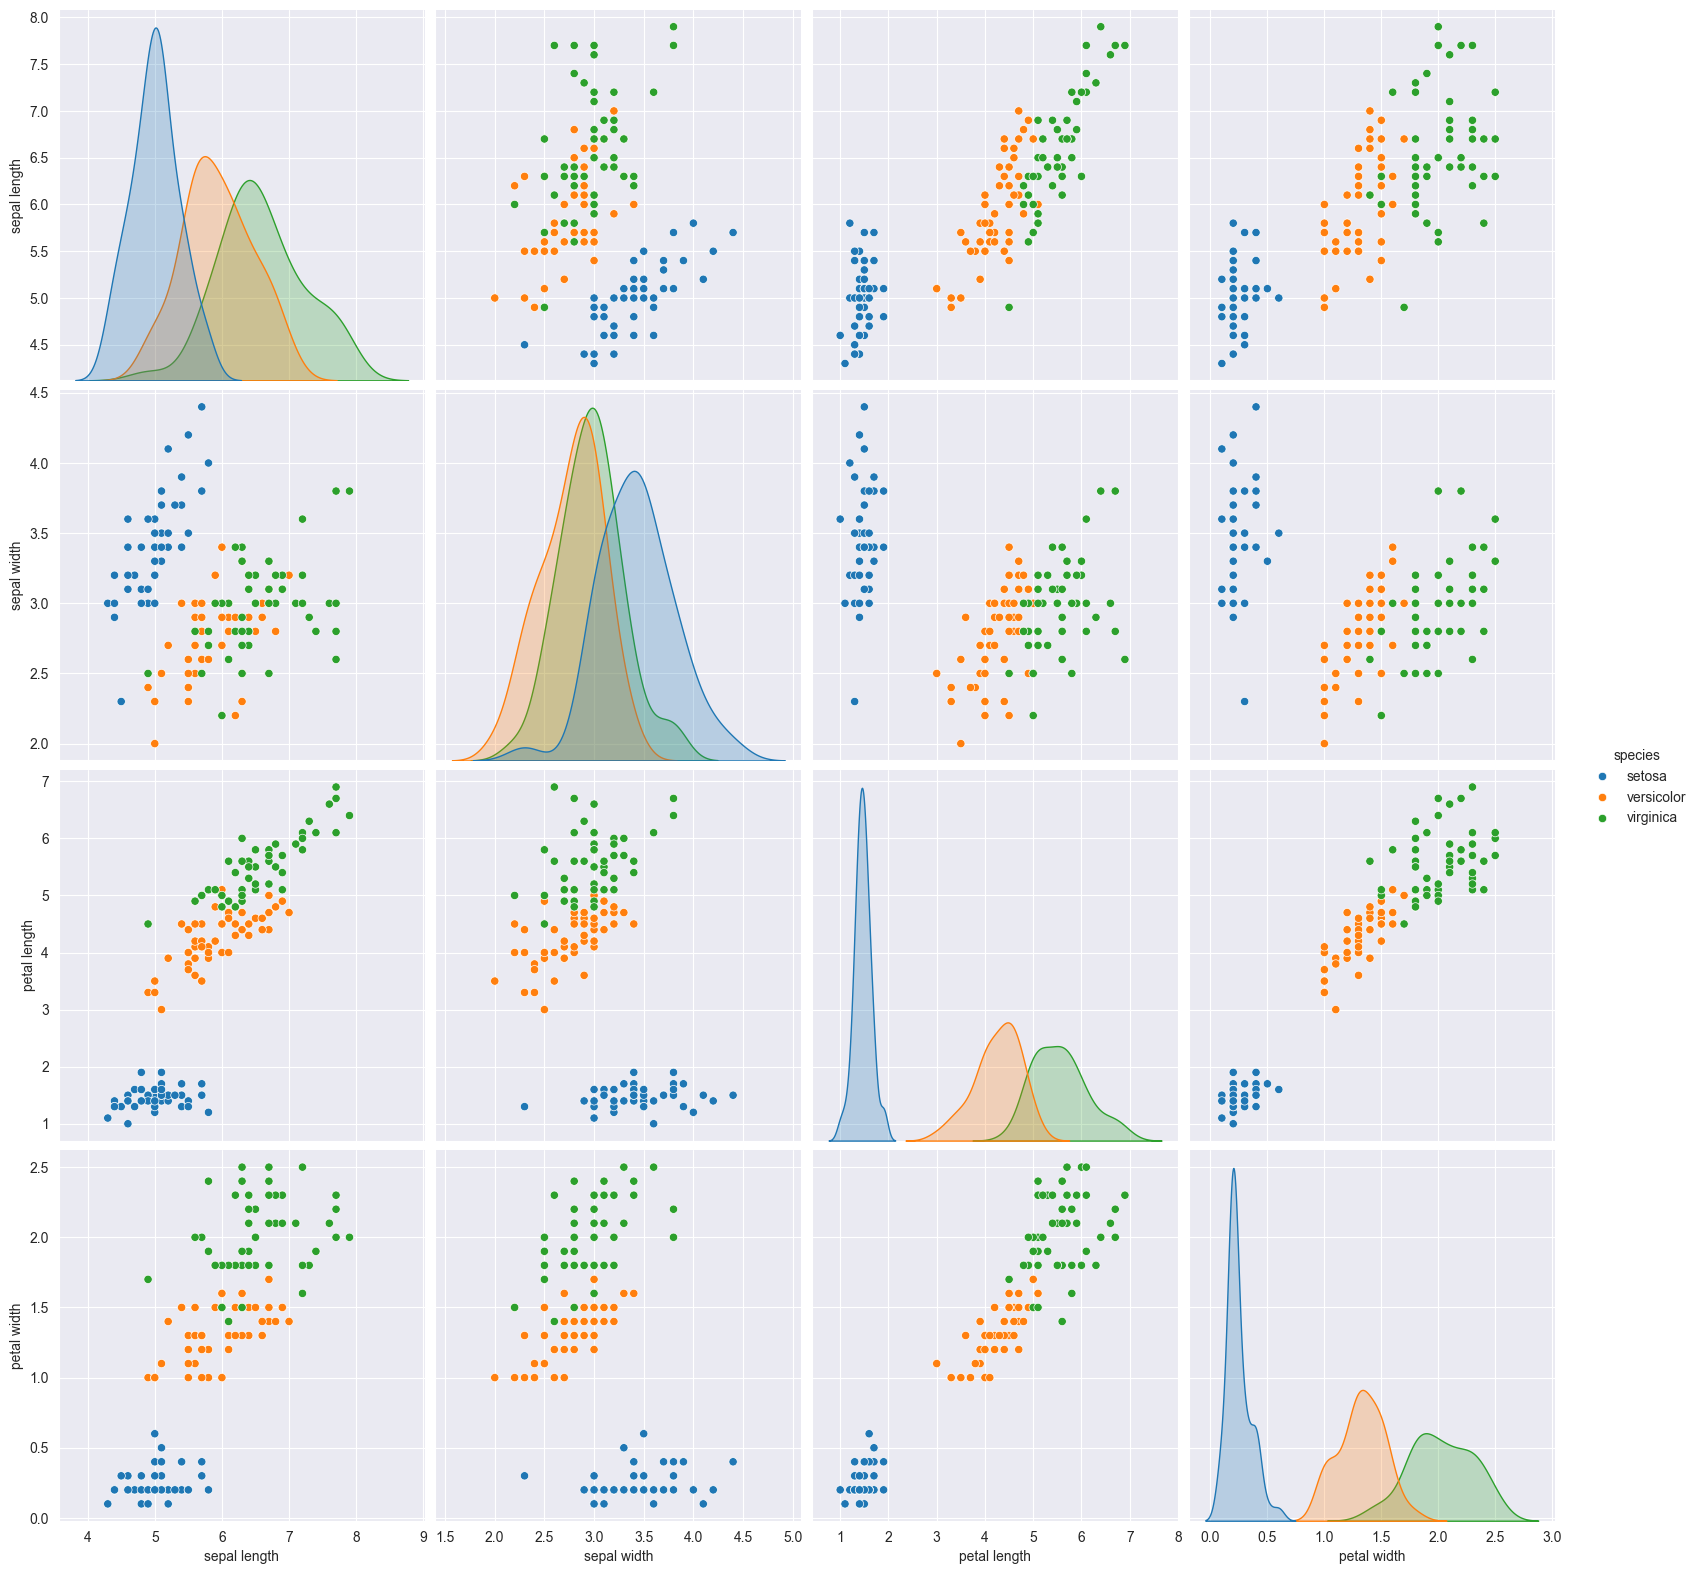

In [12]:
sns.pairplot(iris_df, hue="species", height=4)

<h3>Explaination</h3>

<p>In examining the characteristics of iris species, it becomes clear that petal dimensions are the most critical factors for accurate classification. Statistical analysis indicates that setosa exhibits distinctly smaller petals, with an average petal length of 1.462 cm and a width of 0.246 cm, compared to the larger petals of versicolor and virginica, which average 4.260 cm and 5.552 cm in length, and 1.326 cm and 2.026 cm in width, respectively. This significant difference allows for clear separation of setosa from the other two species, particularly evident in scatter plots where the distinction is visually pronounced. While sepal dimensions provide additional insights, they are less effective for differentiating between versicolor and virginica, as their ranges overlap considerably. Therefore, petal length and width emerge as the most reliable attributes for predicting iris species, underscoring their importance in classification efforts.</p>

<h3>Machine Learning</h3>

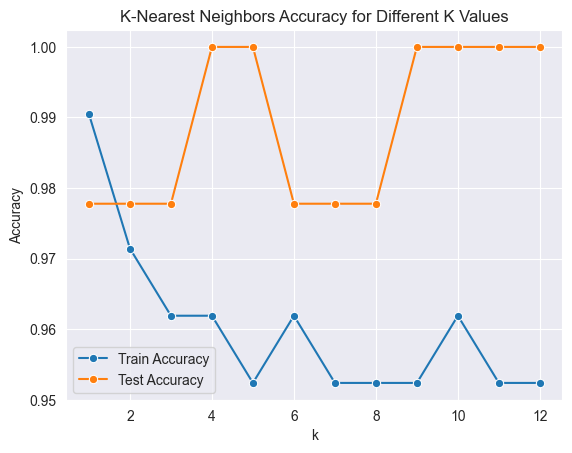

In [18]:
xbest = iris_df.drop(columns=["sepal length", "sepal width", "species"])
ybest = iris_df["species"]

xbesttrain, xbest_test, ybest_train, ybest_test = train_test_split(xbest, ybest, test_size=0.3, random_state=0)

scbest = StandardScaler()
xbesttrain = scbest.fit_transform(xbesttrain)
xbest_test = scbest.transform(xbest_test)

kbest_values = range(1, 13)
trainbest_accuracy = []
testbest_accuracy = []

for k in kbest_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xbesttrain, ybest_train)
    
    ybest_train_pred = knn.predict(xbesttrain)
    train_accuracy = accuracy_score(ybest_train, ybest_train_pred)
    trainbest_accuracy.append(train_accuracy)
    
    y_test_pred = knn.predict(xbest_test)
    test_accuracy = accuracy_score(ybest_test, y_test_pred)
    testbest_accuracy.append(test_accuracy)
    
sns.lineplot(x=kbest_values, y=trainbest_accuracy, marker='o', label='Train Accuracy')
sns.lineplot(x=kbest_values, y=testbest_accuracy, marker='o', label='Test Accuracy')
plt.title("K-Nearest Neighbors Accuracy for Different K Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
    
    

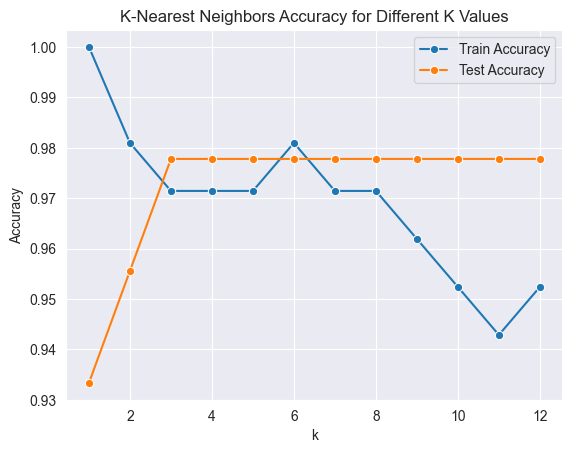

In [19]:
x = iris_df.drop(columns=["species"])
y = iris_df["species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Define range of k values
k_values = range(1, 13)
train_accuracies = []
test_accuracies = []

# Loop over each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = knn.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    y_test_pred = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot both training and test accuracies
sns.lineplot(x=k_values, y=train_accuracies, marker='o', label='Train Accuracy')
sns.lineplot(x=k_values, y=test_accuracies, marker='o', label='Test Accuracy')
plt.title("K-Nearest Neighbors Accuracy for Different K Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h3>Explaining the machine learning</h3>
<p>Between the two grpahs there are big disparties. The first graph uses two features, and higher test accuracy at certain k values, peaking at near 100 percent with variations as k changes. The signals overfitting, where the model fits the trainning data exceptionall well but struggles to generalize the unseen data. The second grpahs incorporates all the features, and displays a more stable test accuracy, although the maximum accuracy accuracy achieved is slightly lower than that of the first graph. This stability indicates that using a comprehensive set of featues leadss to better generalization. While the first grpahs showcaes higher peak accuracy at specific k-valuess, the second grpah's constistent performance underscores the imports of feature selection.</p>

### Question 2 (1000 pts)

In Case Study 6, we explored guage hight and stream flow values captured at 15-minute intervals over a 3-day period. You began by looking at the PMF and CDF of the guage measurements used KDE to understand the flow. In the end, you built a linear regression that uses guage height to predict to streamflow. All of this was based on a random sample of the data.

- Write a `for` loop that extracts a different random sample from the guage data in each iteration and computes PDF, CDF, KDE, and the regression model. Run at least 25 iterations and save the results.
- Run the same analysis as above on the full dataset. 
- Finally, build a plot or series of plots and tables that summarizes the differences between the sample runs and the full datasets. Analyze the results and comment on the differences or lack of differences.
- Explain in your own words why the correlation coefficient between guage height and streamflow is so high. 

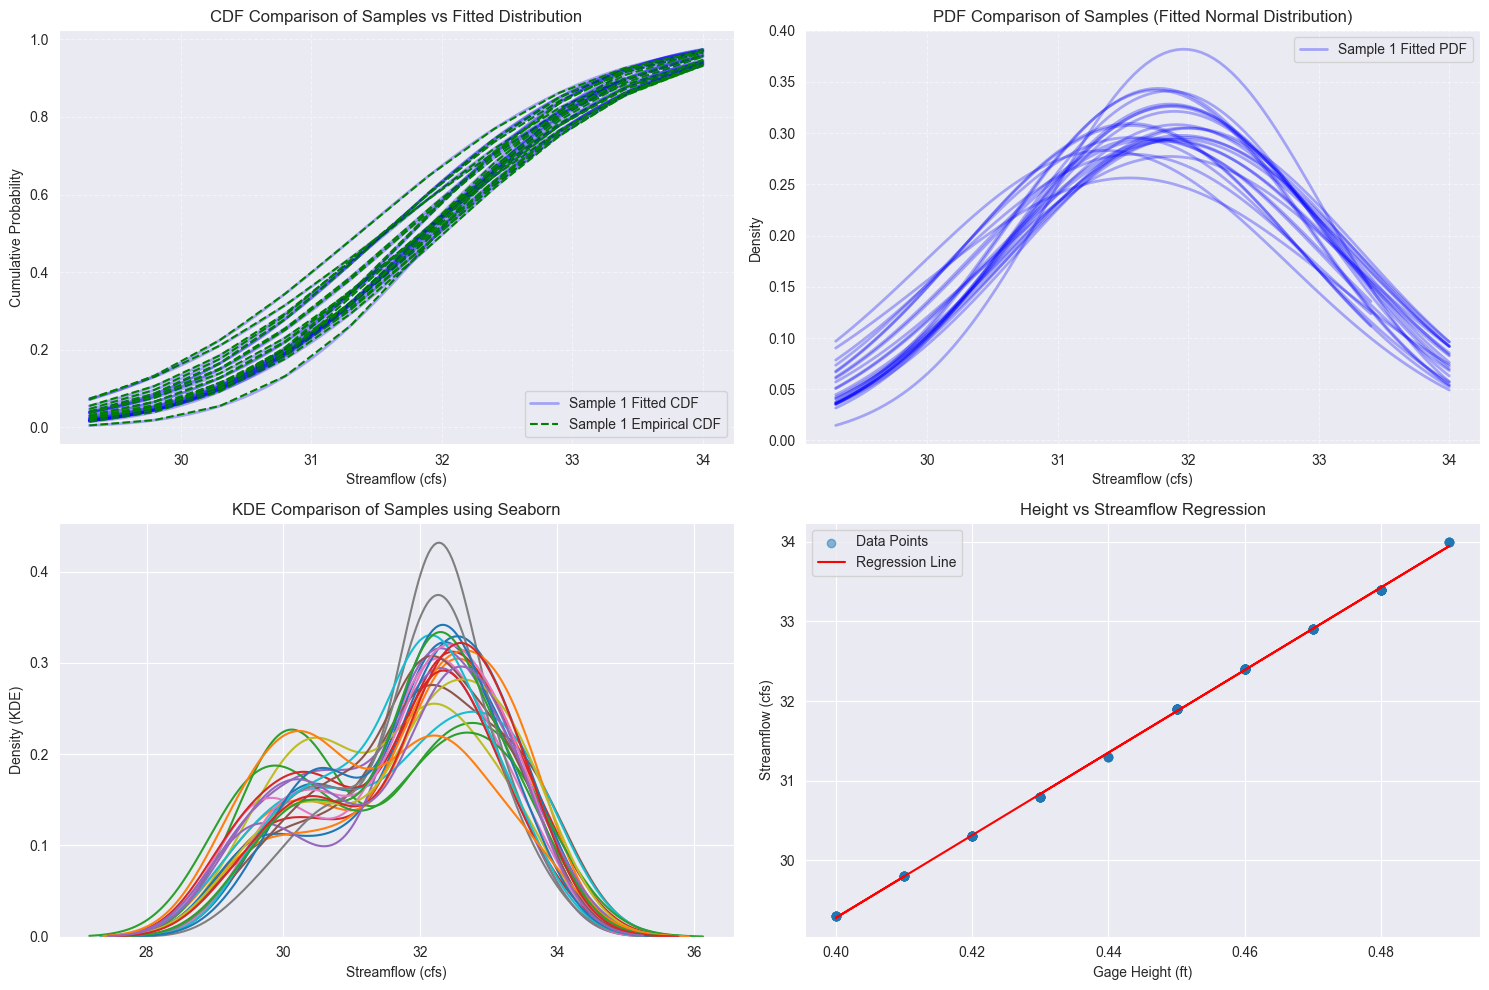

In [23]:
# Provide your answer the cells here and below.
# Load the data from the uploaded file
eagledata = pd.read_excel(".\\Data\\gage_war_eagle.xlsx")

def analyzeData(data):
    flow = data["streamflow_cfs"]
    height = data["gage_height_ft"]
    
    # Fit a normal distribution to streamflow data
    flow_rv = stats.norm(flow.mean(), flow.std())
    flow_sorted = np.sort(flow)
    
    # Calculate PDF, CDF, and KDE
    sflow_pdf = flow_rv.pdf(flow_sorted)
    sflow_cdf = flow_rv.cdf(flow_sorted)
    kde = gaussian_kde(flow_sorted, bw_method=0.2)
    
    # Linear regression between height and flow
    result = stats.linregress(height, flow)
    
    # Return calculated results
    results = {
        'height': height.values,
        'flow_sorted': flow_sorted,
        'pdf': sflow_pdf,
        'cdf': sflow_cdf,
        'kde': kde(flow_sorted),
        'slope': result.slope,
        'intercept': result.intercept,
        'flow_rv': flow_rv
    }
    return results

# Generate 25 random samples and analyze each
sample_results = []
for i in range(25):
    sample = eagledata.sample(n=50, random_state=i, axis=0, ignore_index=True)
    sample_results.append(analyzeData(sample))

# Full dataset analysis
full_results = analyzeData(eagledata)

# Plotting all four graphs in one figure
plt.figure(figsize=(15, 10))

# CDF Plot
plt.subplot(2, 2, 1)
for i, sample in enumerate(sample_results):
    flow_sorted = sample['flow_sorted']
    sflow_cdf = sample['cdf']
    
    # Generate CDF for the full x range based on the fitted normal distribution
    x_val_range = np.linspace(flow_sorted.min(), flow_sorted.max(), 100)
    xvals_cdf_output = sample['flow_rv'].cdf(x_val_range)
    
    # Plot the fitted distribution CDF
    plt.plot(x_val_range, xvals_cdf_output, color="blue", alpha=0.3, linewidth=2, label=f"Sample {i+1} Fitted CDF" if i == 0 else "")

    # Plot the sample data's CDF
    plt.plot(flow_sorted, sflow_cdf, color="green", linestyle="--", label=f"Sample {i+1} Empirical CDF" if i == 0 else "")

plt.title("CDF Comparison of Samples vs Fitted Distribution")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Cumulative Probability")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.5)

# PDF Plot
plt.subplot(2, 2, 2)
for i, sample in enumerate(sample_results):
    flow_sorted = sample['flow_sorted']
    sflow_pdf = sample['pdf']
    
    # Generate PDF for the fitted distribution
    x_val_range = np.linspace(flow_sorted.min(), flow_sorted.max(), 100)
    xvals_pdf_output = sample['flow_rv'].pdf(x_val_range)
    
    # Plot the fitted distribution PDF
    plt.plot(x_val_range, xvals_pdf_output, color="blue", alpha=0.3, linewidth=2, label=f"Sample {i+1} Fitted PDF" if i == 0 else "")

plt.title("PDF Comparison of Samples (Fitted Normal Distribution)")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.grid(True, linestyle="--", alpha=0.5)

# KDE Plot
plt.subplot(2, 2, 3)
for i, result in enumerate(sample_results):  # Limiting to first 5 for clarity
    sns.kdeplot(result['flow_sorted'], label=f'Sample {i+1} KDE')

plt.title("KDE Comparison of Samples using Seaborn")
plt.xlabel("Streamflow (cfs)")
plt.ylabel("Density (KDE)")

# Regression Plot
plt.subplot(2, 2, 4)
plt.scatter(full_results['height'], eagledata['streamflow_cfs'], label='Data Points', alpha=0.5)
plt.plot(full_results['height'], full_results['slope'] * full_results['height'] + full_results['intercept'], color='red', label='Regression Line')
plt.title("Height vs Streamflow Regression")
plt.xlabel("Gage Height (ft)")
plt.ylabel("Streamflow (cfs)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()